In [61]:
#Import data
import pandas as pd
file = "binary"
# file = "three"
# file = "five"
method = "PCA"
reduced = ""
# reduced = "(reduced)"

DATAFILE = "./prepared_data/join_"+file+"_scale.csv"
file = file + reduced
Purchase_DF = pd.read_csv(DATAFILE)
print(list(Purchase_DF))
# Purchase_DF

['mean_unexpcost', 'median_unexpcost', 'mean_stdcost', 'median_stdcost', 'mean_pocost', 'median_pocost', 'mean_qty', 'median_qty', 'mean_costsave', 'median_costsave', 'mean_spend', 'median_spend', 'mean_return_spend', 'median_return_spend', 'mean_leadtime', 'median_leadtime', 'mean_abc', 'median_abc', 'mean_source', 'median_source', 'Category', 'mean_late', 'median_late', 'mean_early', 'median_early', '%Critical', 'SupplierID', 'quality_risk_mean', 'quality_risk_median', 'delivery_risk_mean', 'delivery_risk_median']


In [62]:
#Select features
feats = ['mean_unexpcost', 'mean_return_spend', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime','mean_abc', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
if(reduced != ""):
    feats = ['mean_unexpcost', 'mean_return_spend','mean_spend',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
    print(feats)
Purch_PCA = Purchase_DF[feats]
Purch_PCA = Purch_PCA.dropna()

X = Purch_PCA.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [52]:
#Run with 6 components
pca = PCA(n_components=6)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (578, 13)
transformed shape: (578, 6)


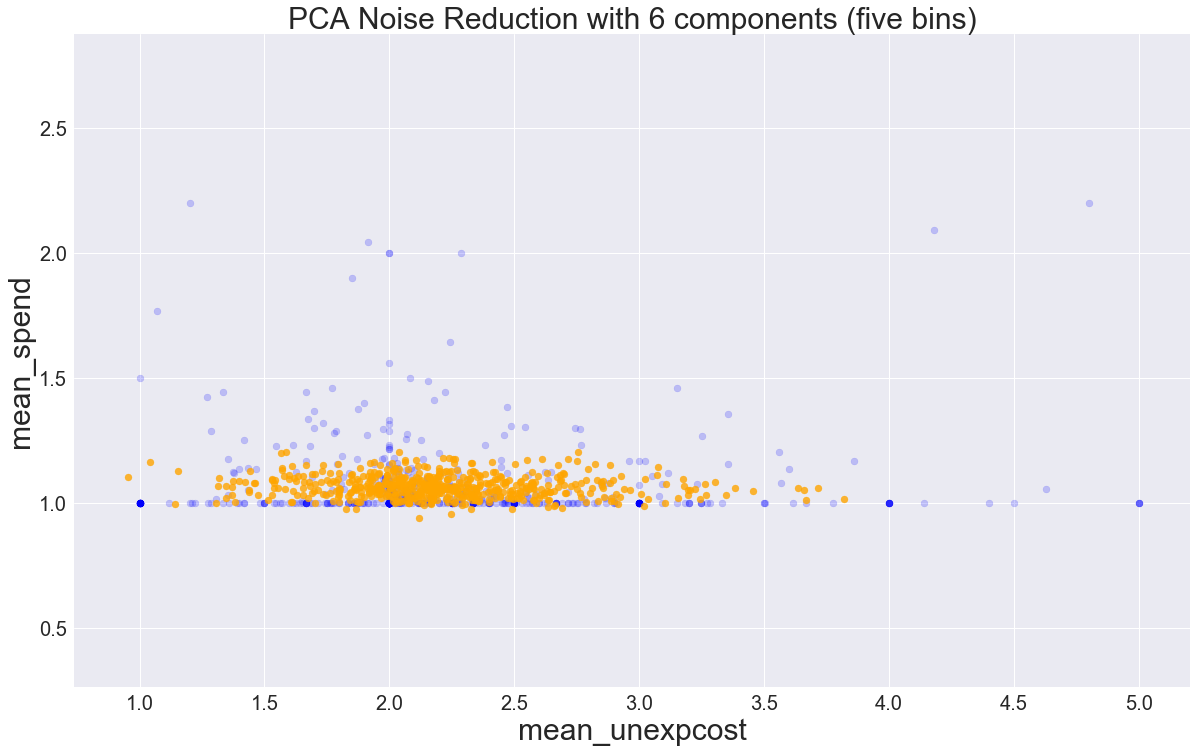

In [53]:
#Plot first two features against reduction
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(20,12))
plt.xlabel('mean_unexpcost', fontsize=30)
plt.ylabel('mean_spend', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title("PCA Noise Reduction with 6 components ("+file+" bins)", fontsize=30)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color = "b")
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color = "orange")
plt.axis('equal');
plt.savefig(method+"_"+file+"_bin_noise_reduction")

In [54]:
#Run
pca = PCA(n_components = 6)
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(578, 13)
(578, 6)


In [55]:
print(pca.explained_variance_)

[1.79823563 1.67447489 1.11872756 0.78815668 0.767715   0.69172966]


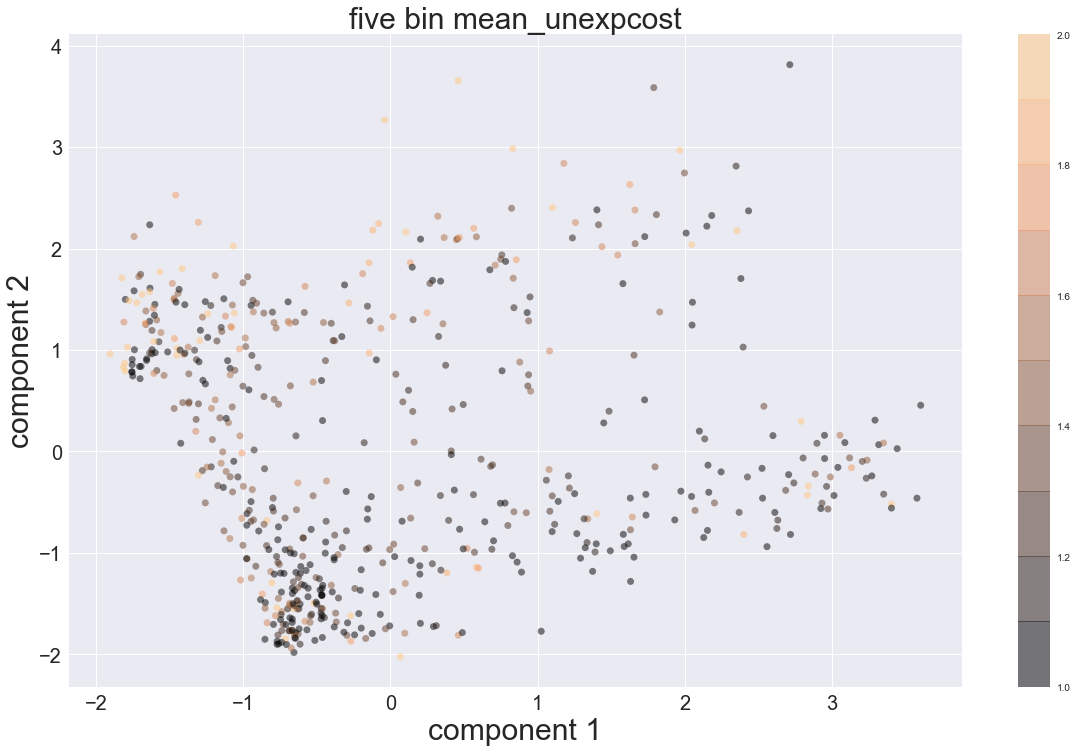

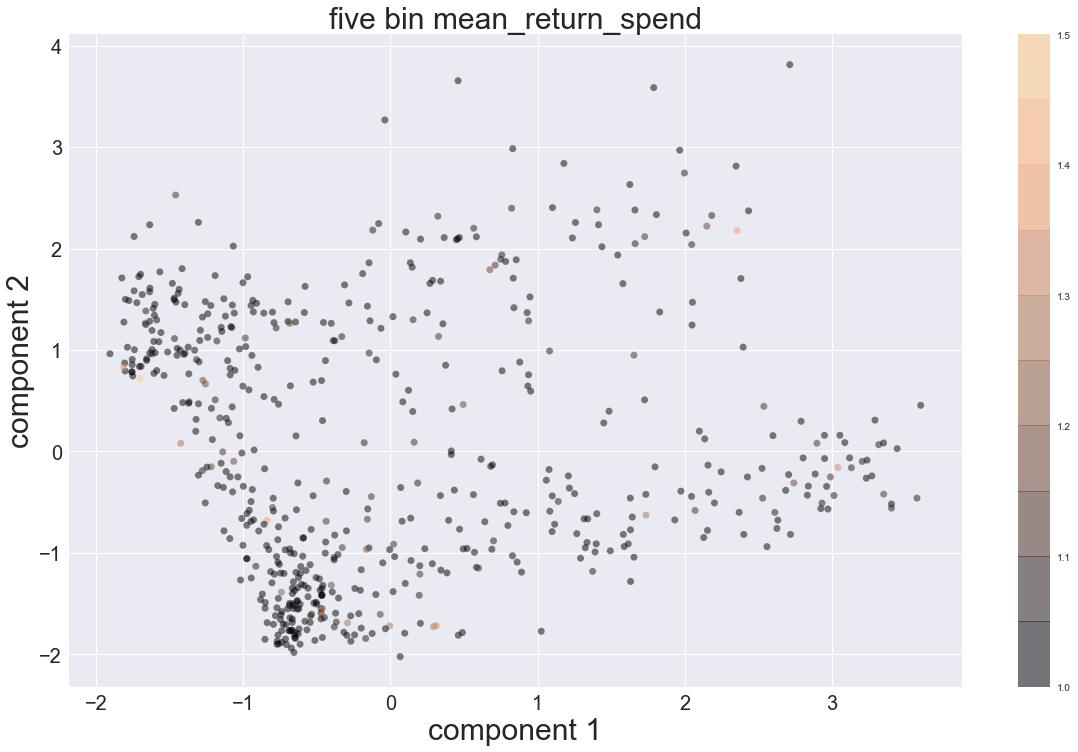

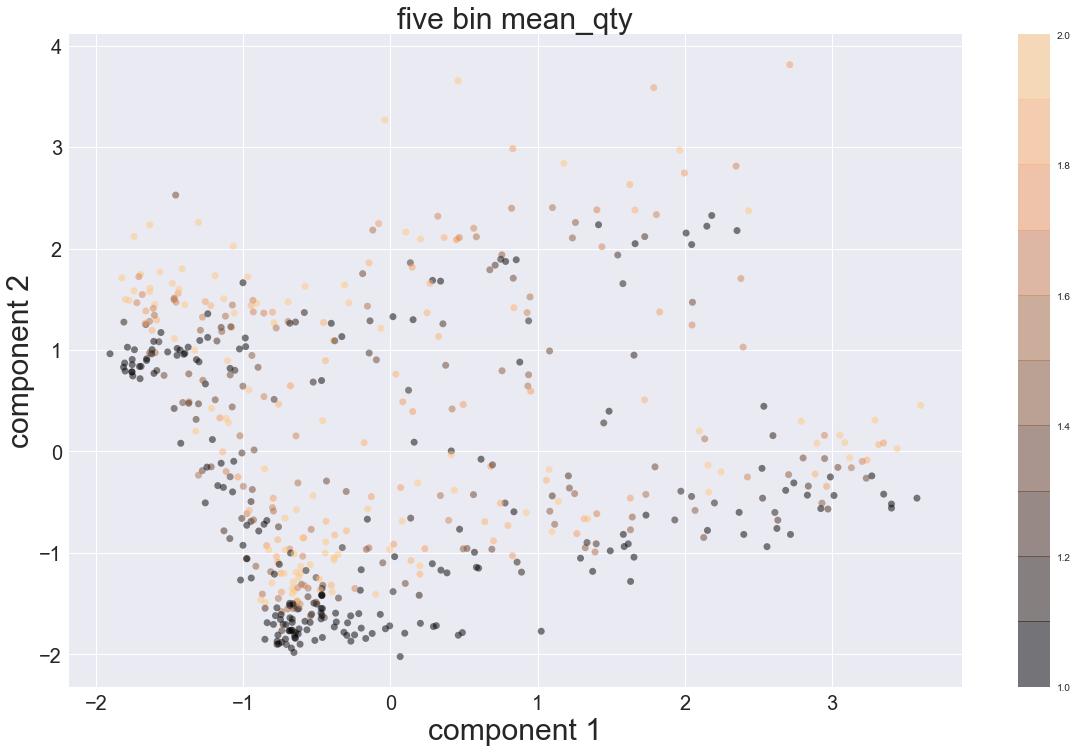

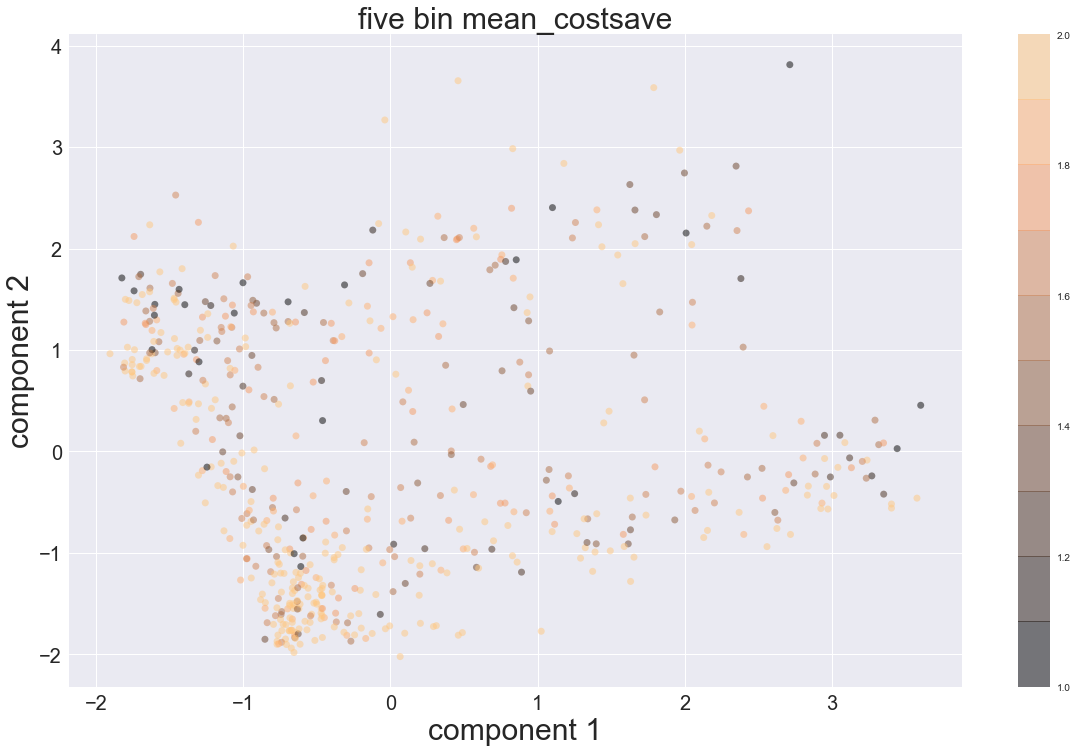

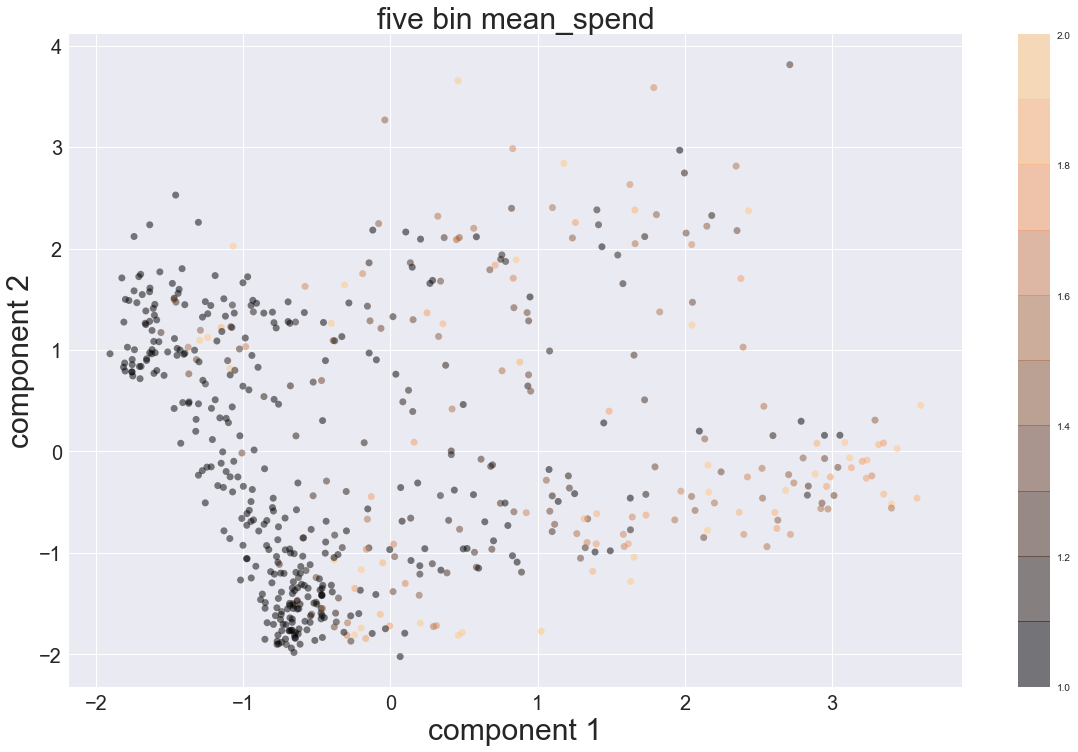

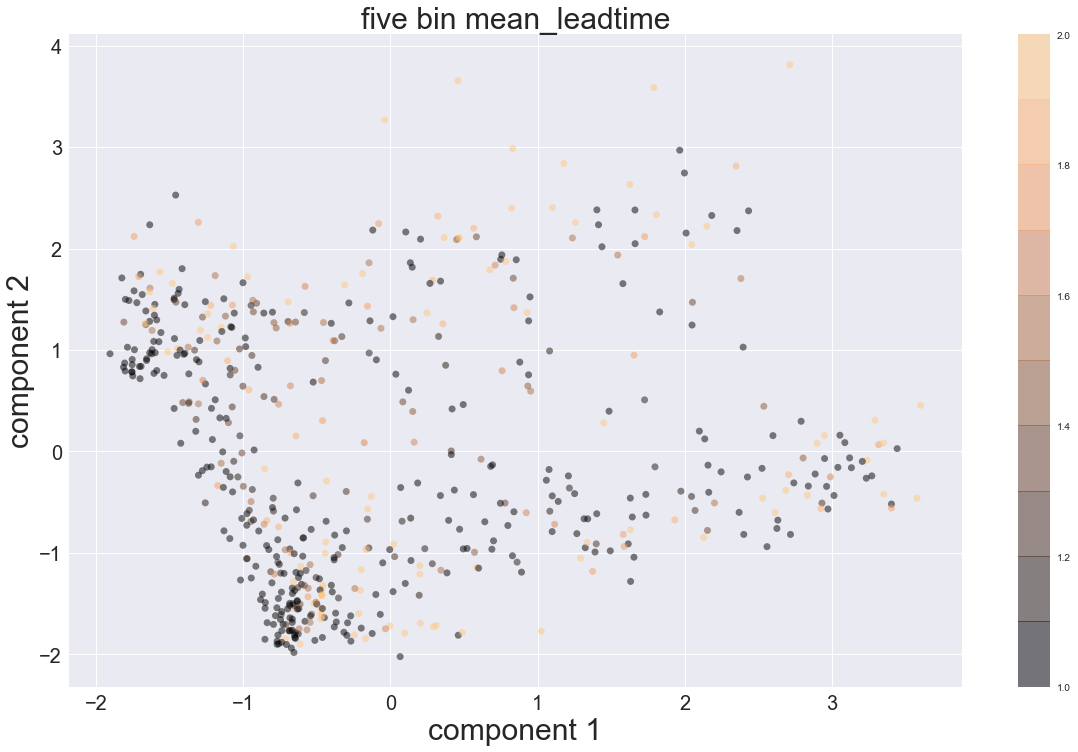

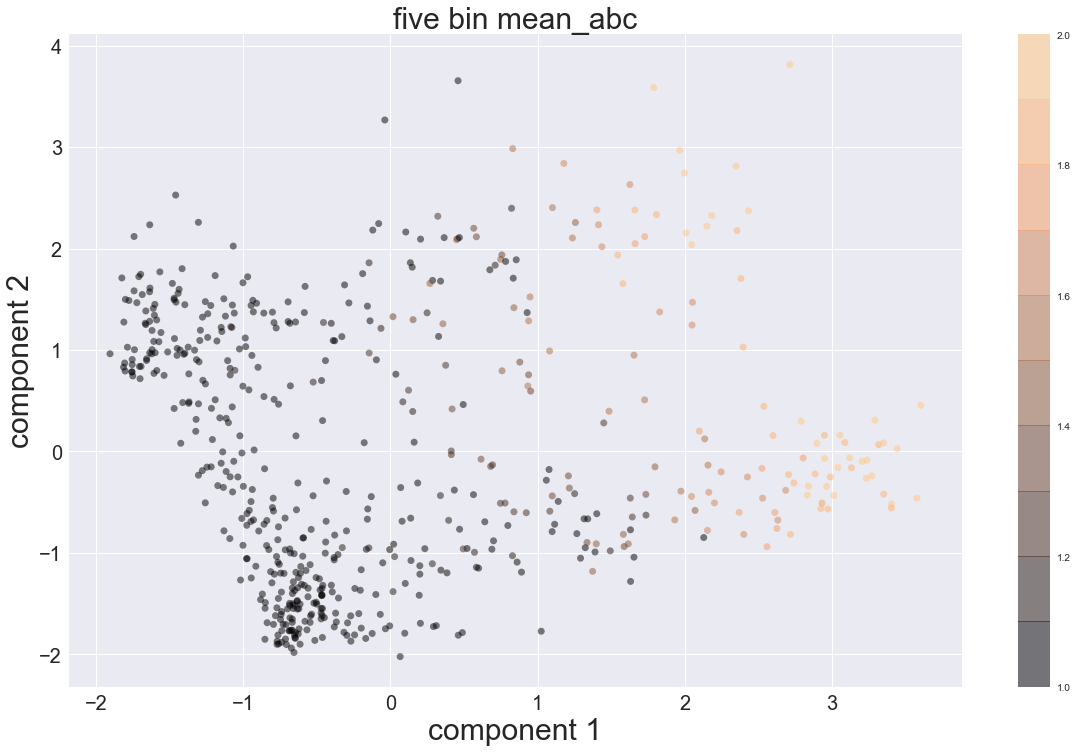

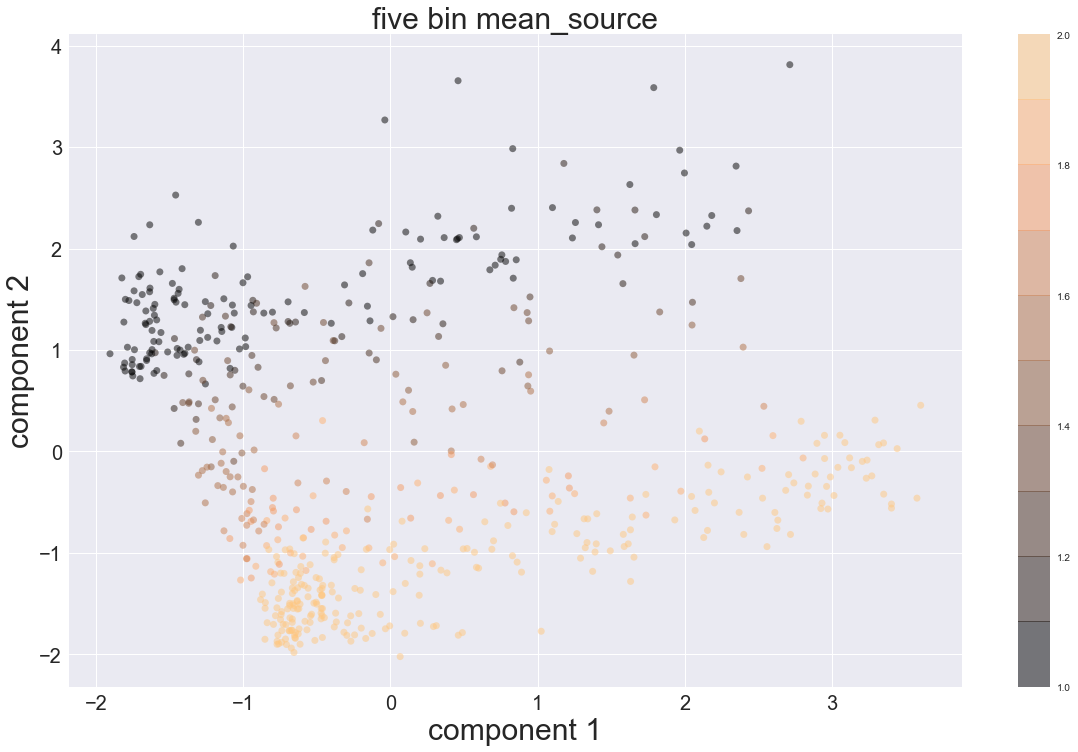

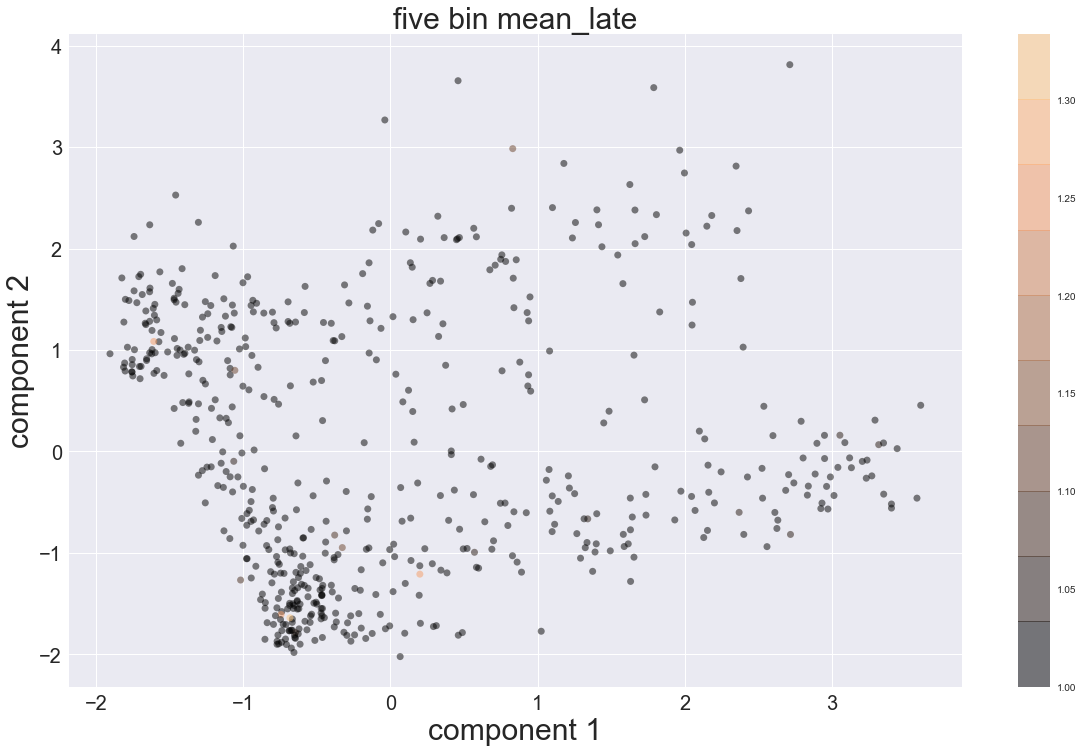

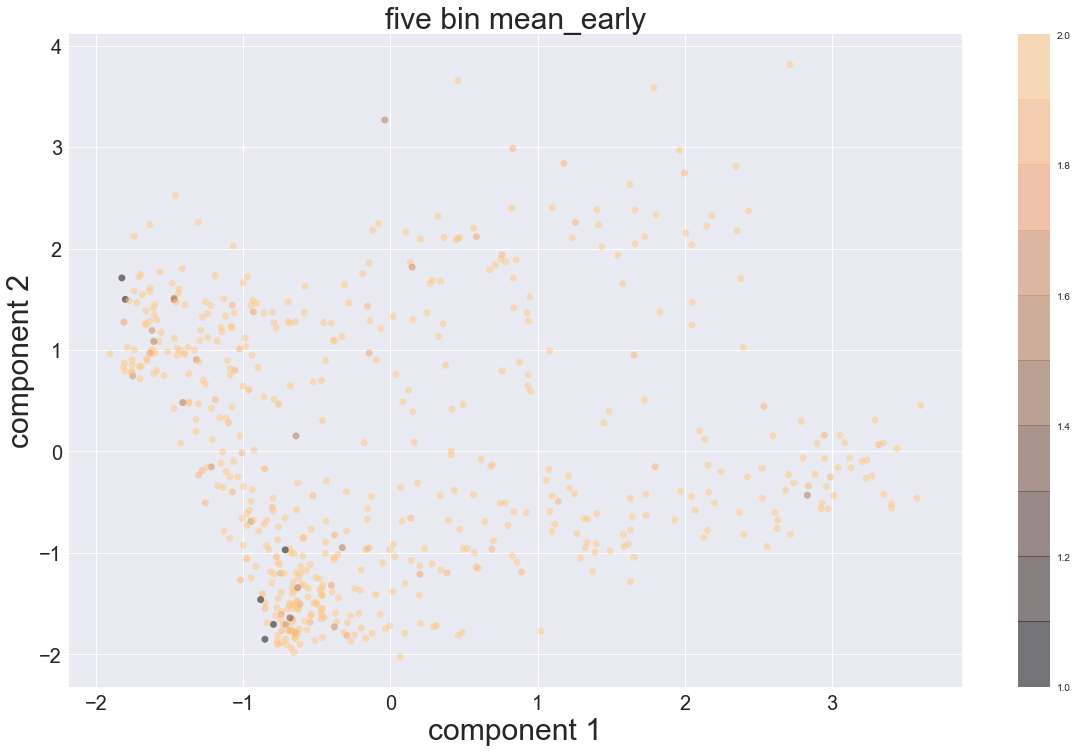

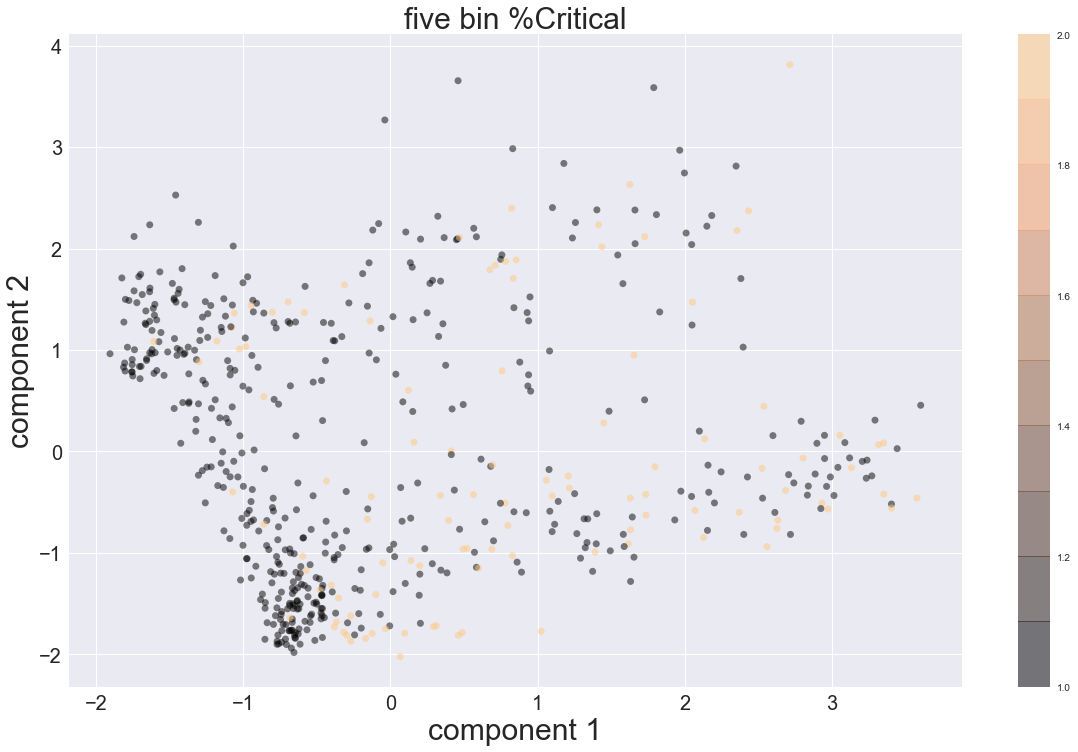

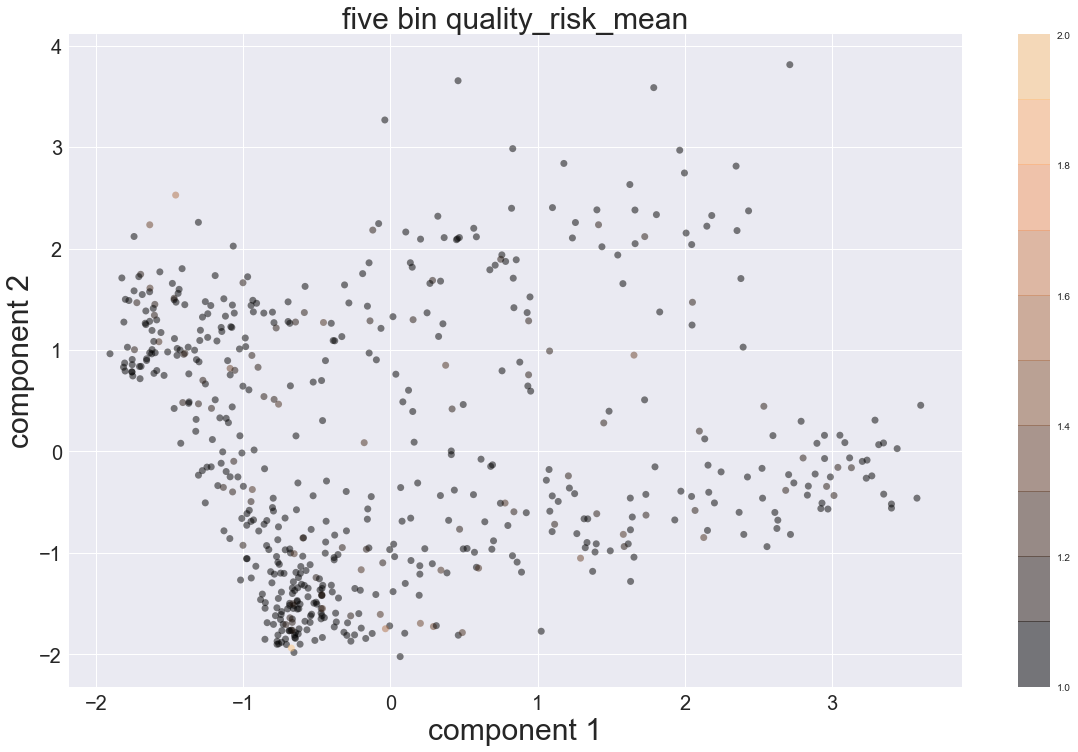

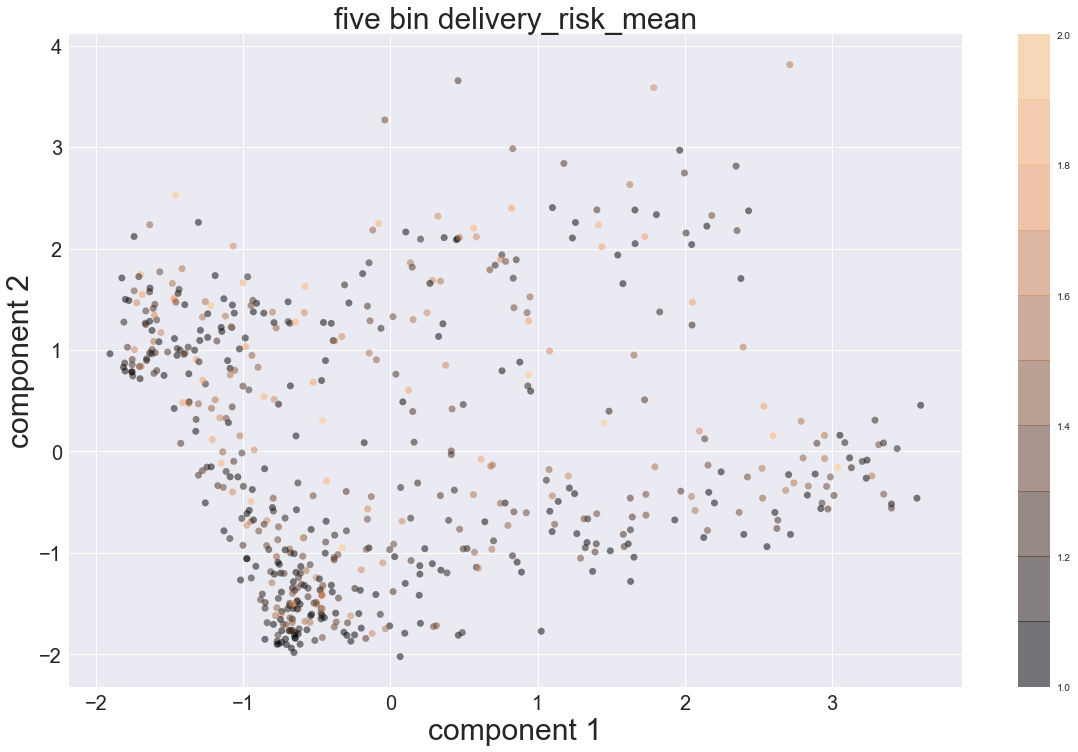

In [56]:
#plot the components against each feature
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 0], projected[:, 1],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 1', fontsize=30)
    plt.ylabel('component 2', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+" bin "+feat, fontsize=30)
    plt.colorbar();
    fname = method+"_"+file+"_PCA_1_2_" + feat
    plt.savefig(fname)
    plt.show()

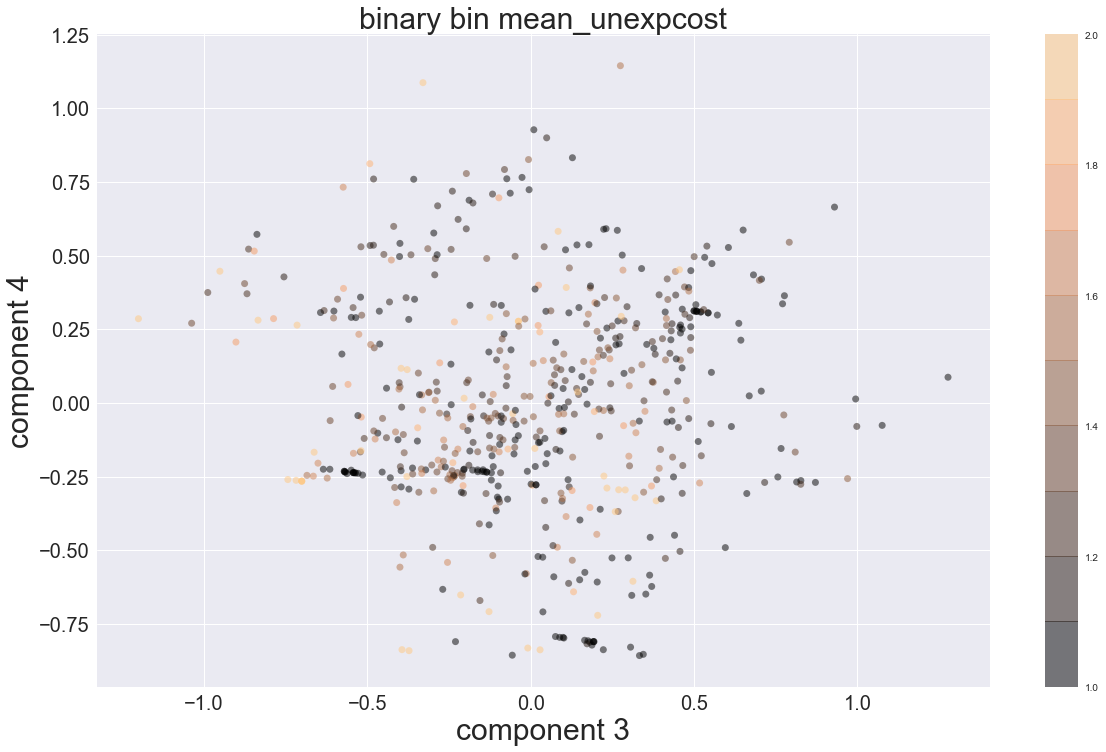

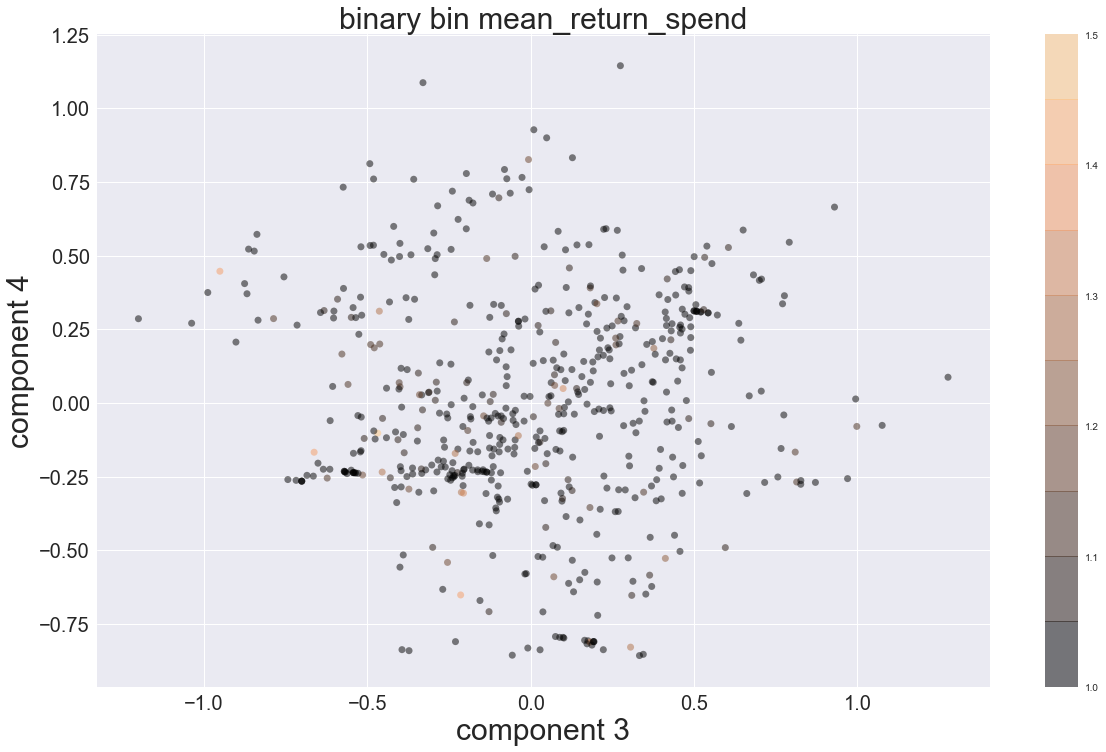

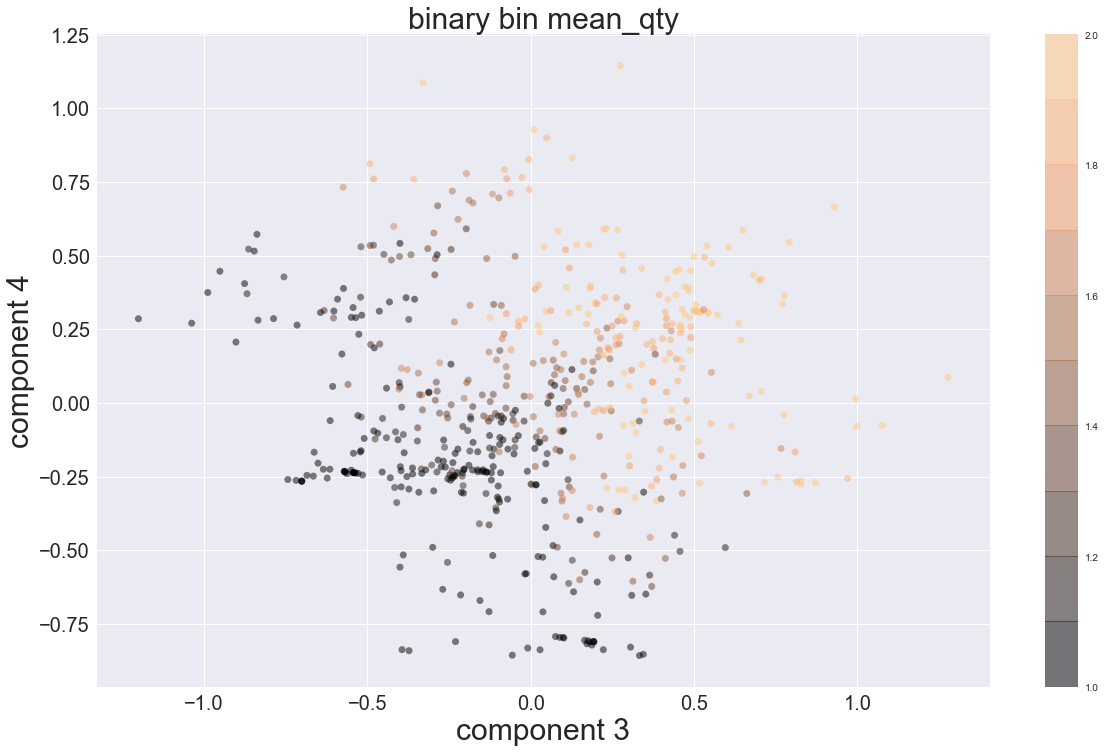

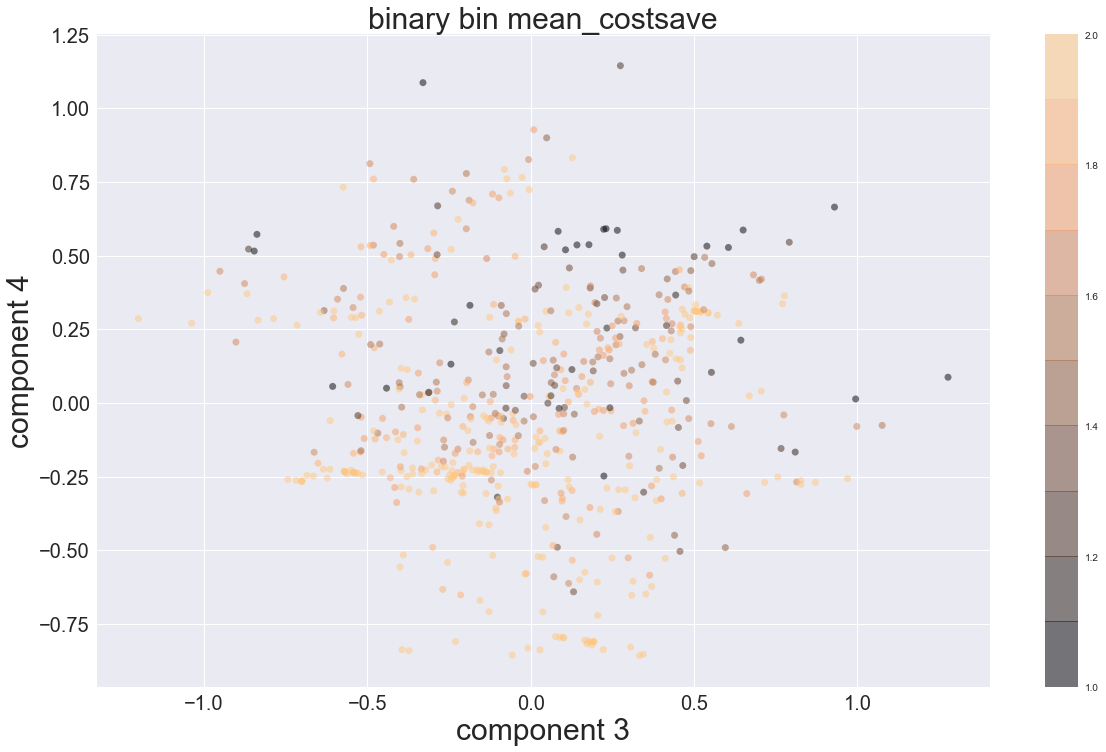

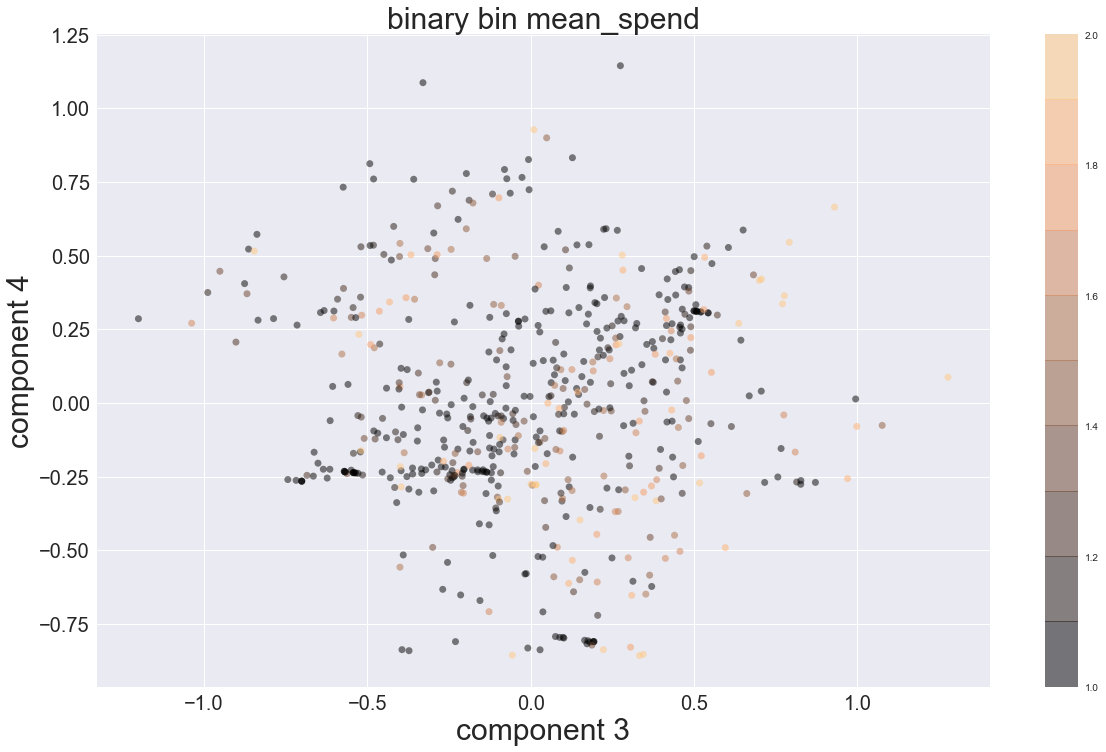

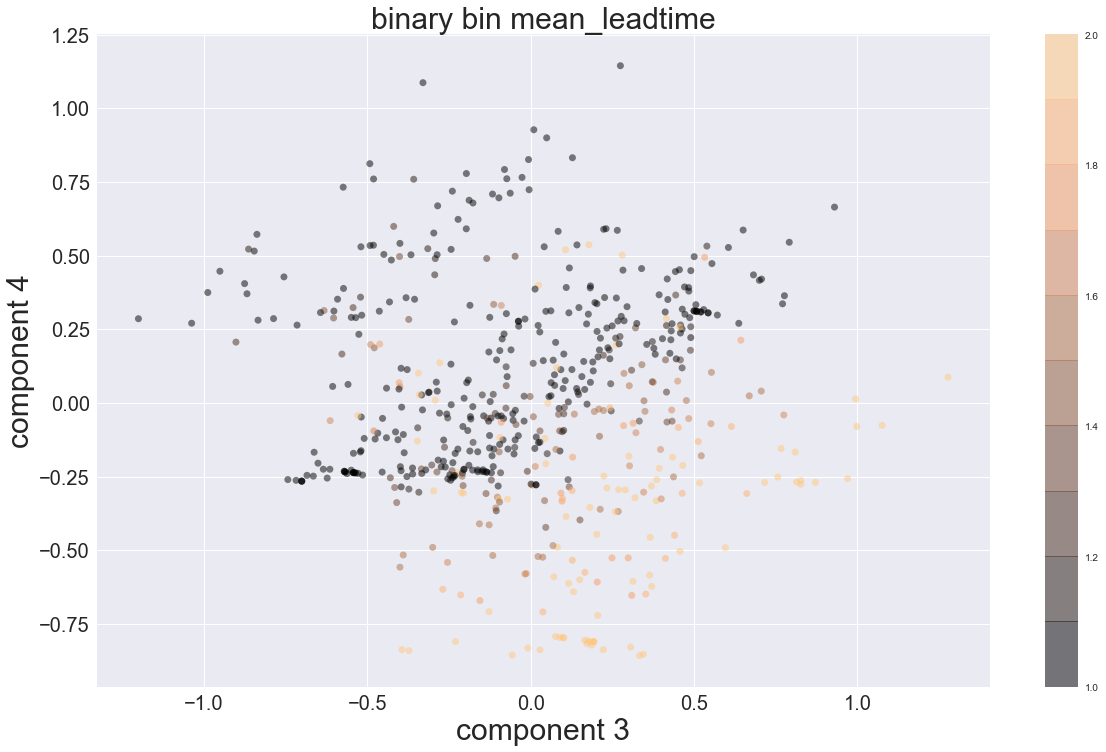

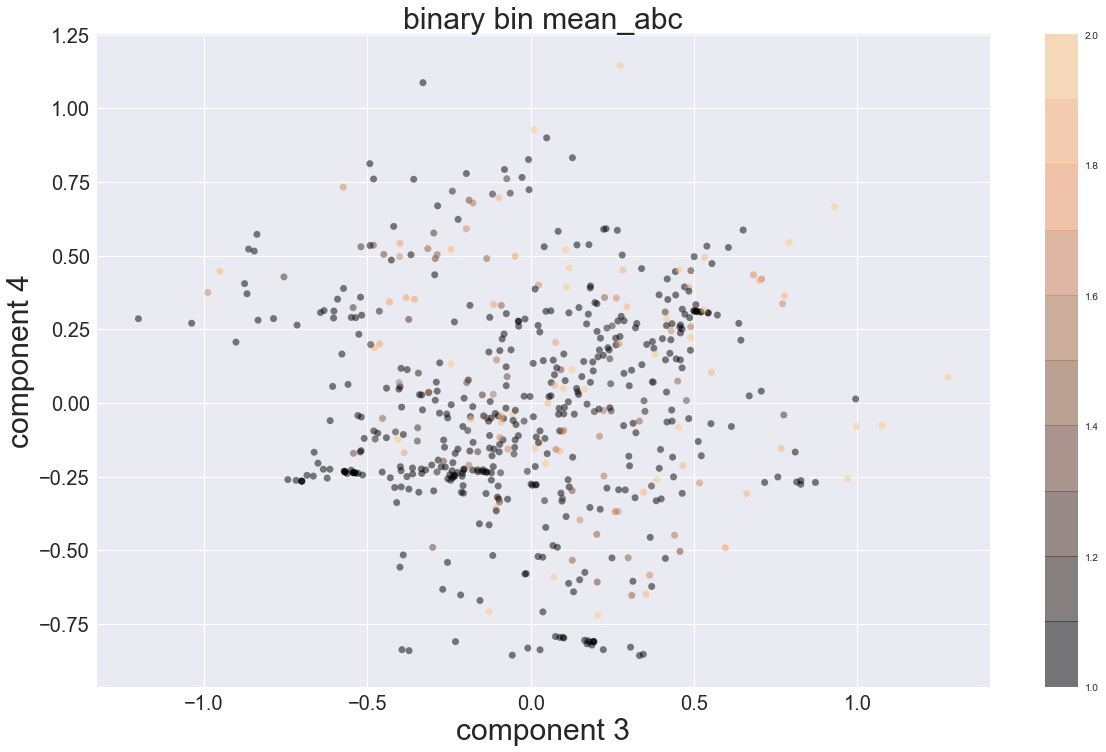

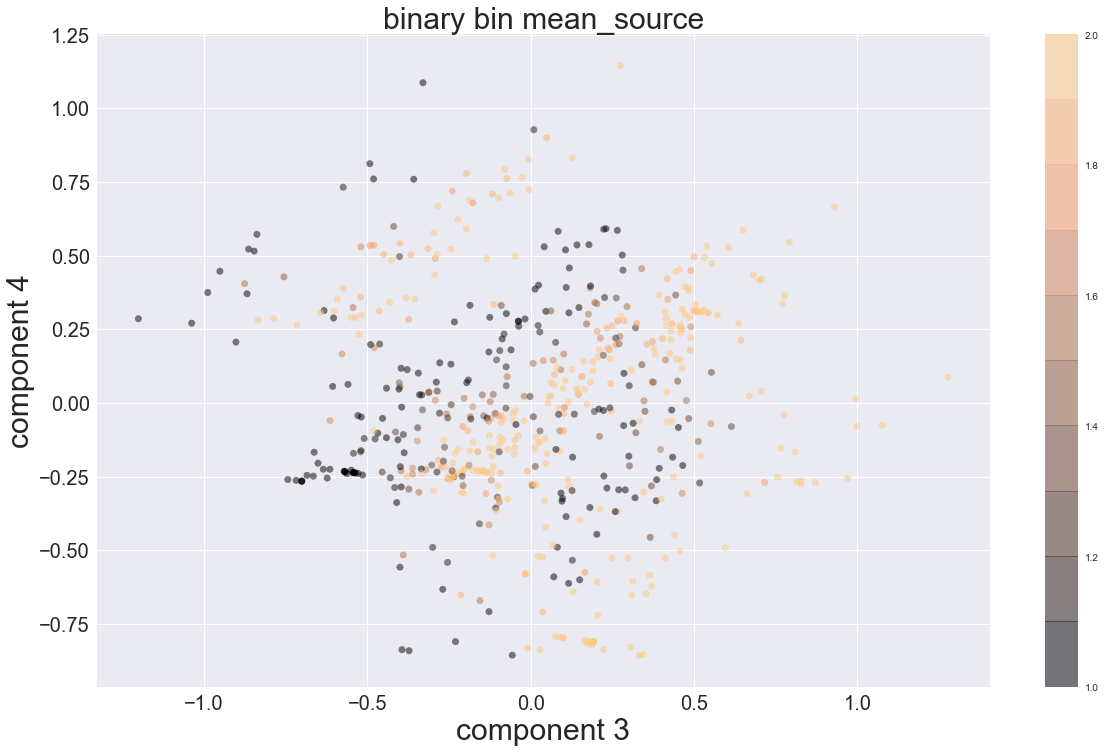

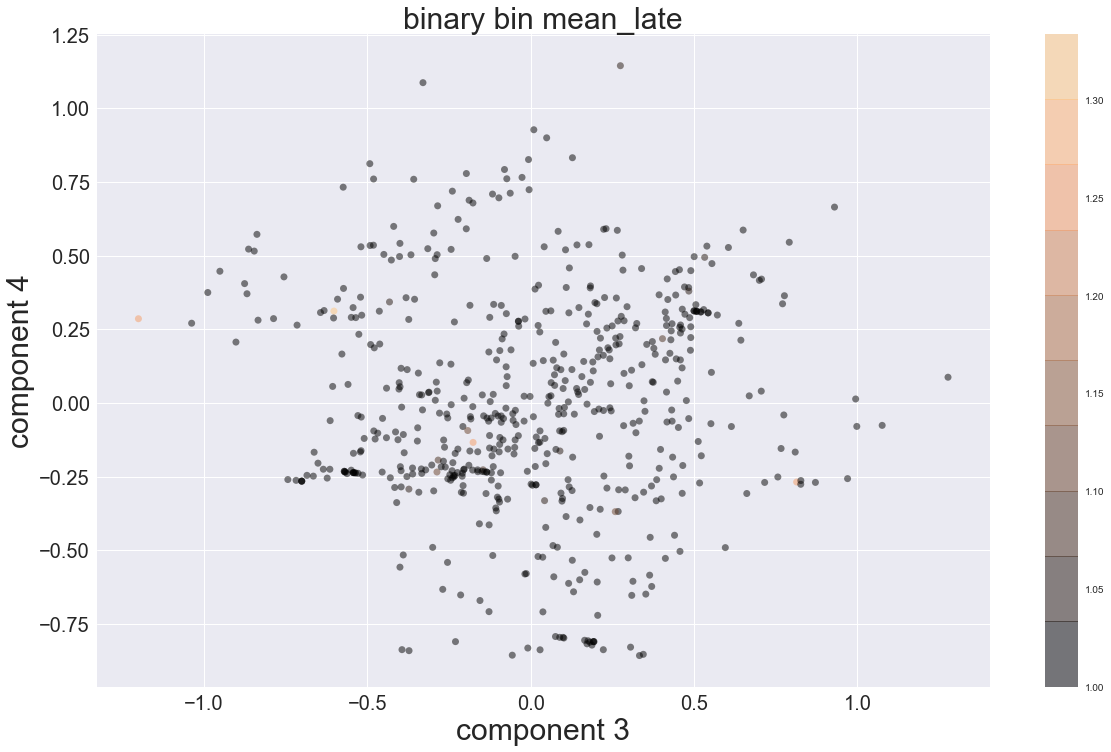

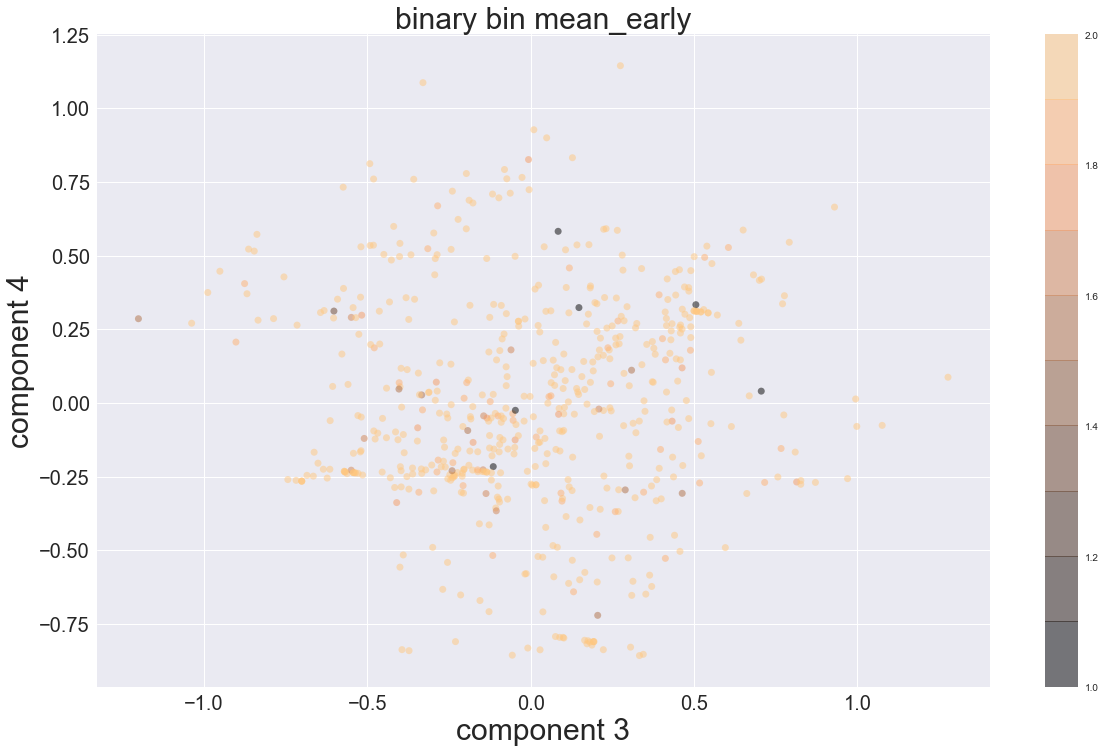

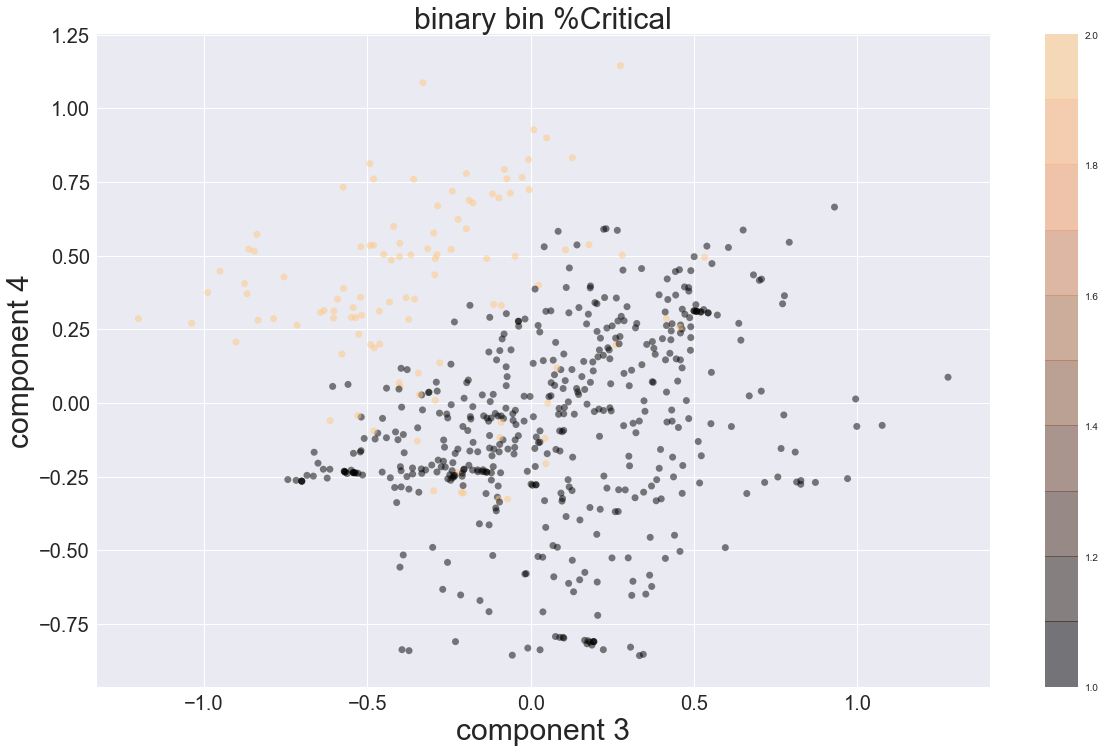

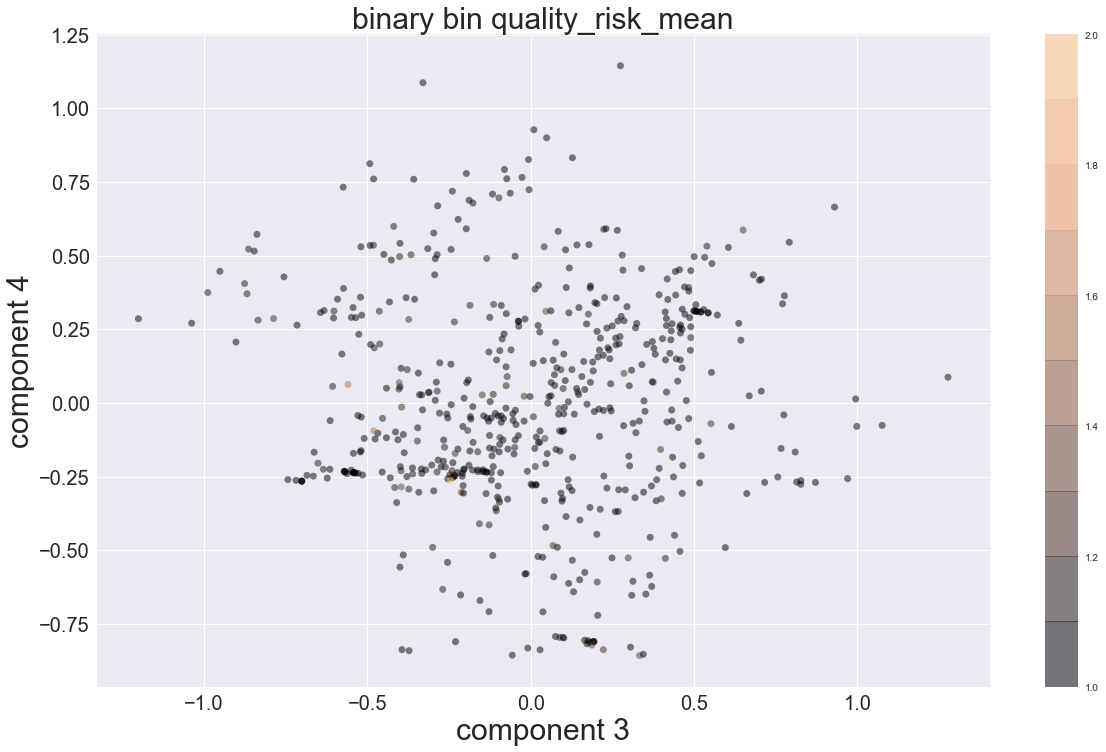

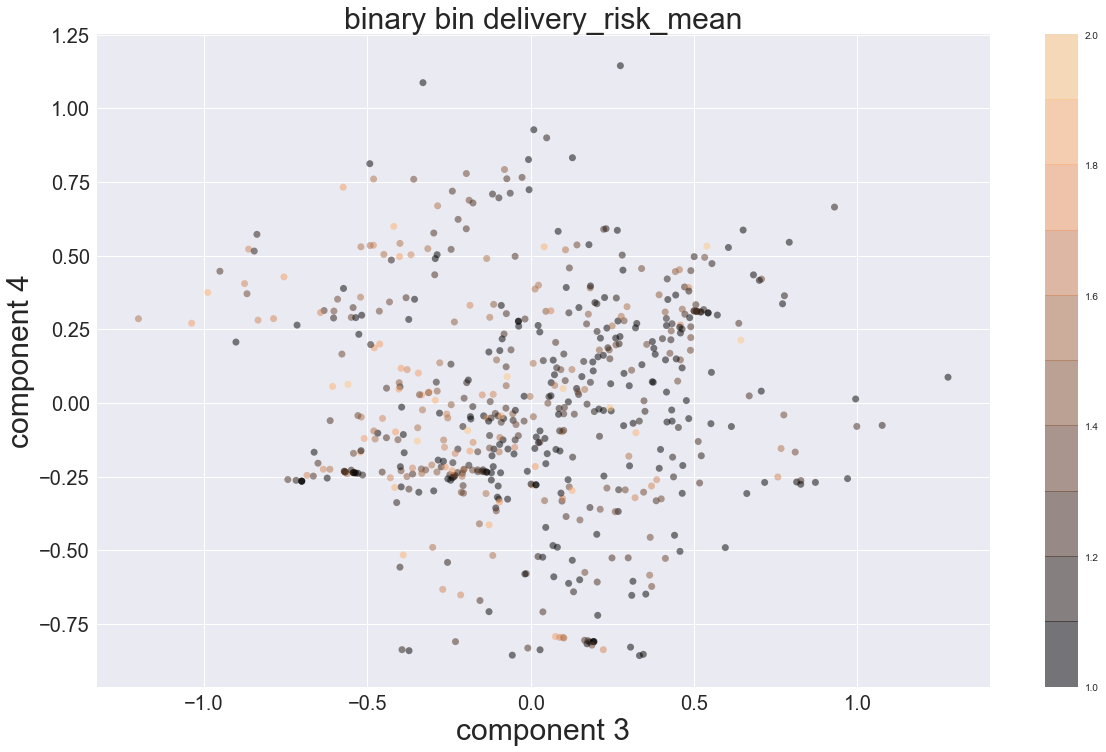

In [39]:
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 2], projected[:, 3],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 3', fontsize=30)
    plt.ylabel('component 4', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+" bin "+feat, fontsize=30)
    plt.colorbar();
    fname = method+"_"+file+"_PCA_3_4_" + feat
    plt.savefig(fname)
    plt.show()

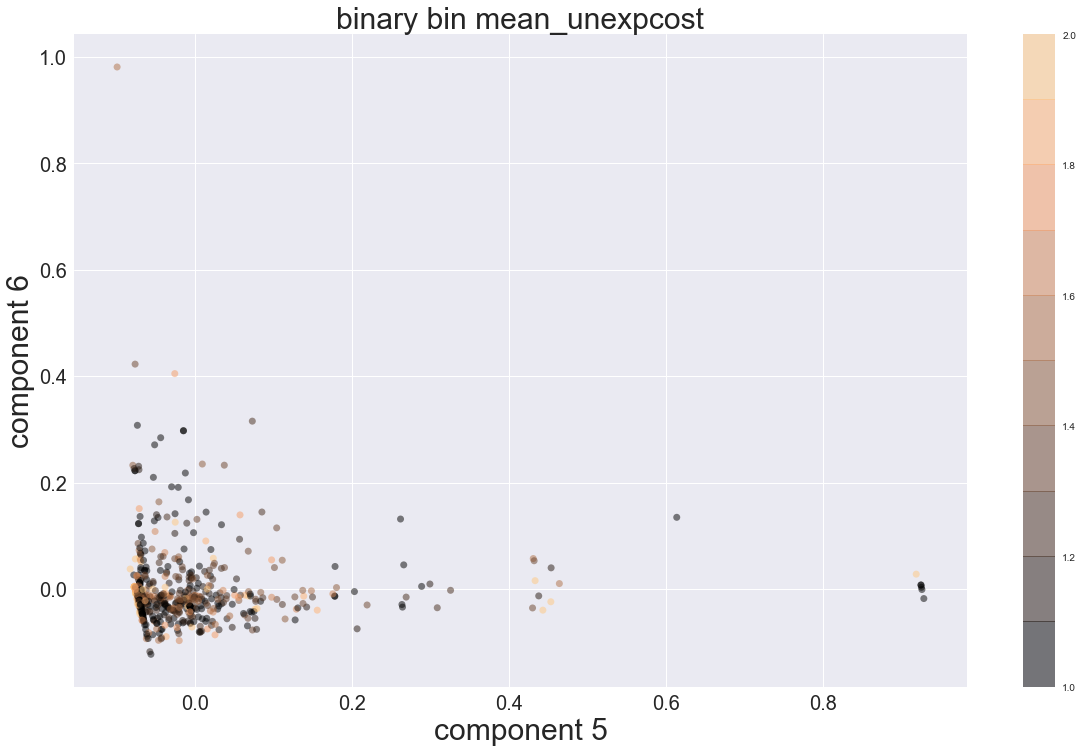

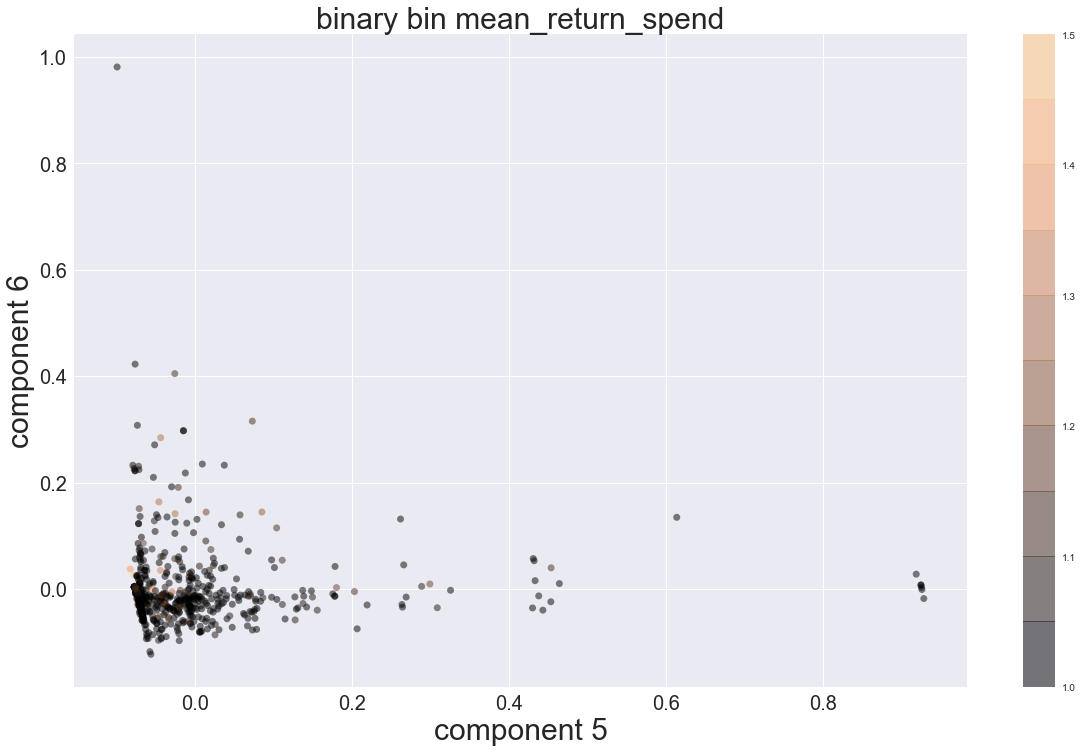

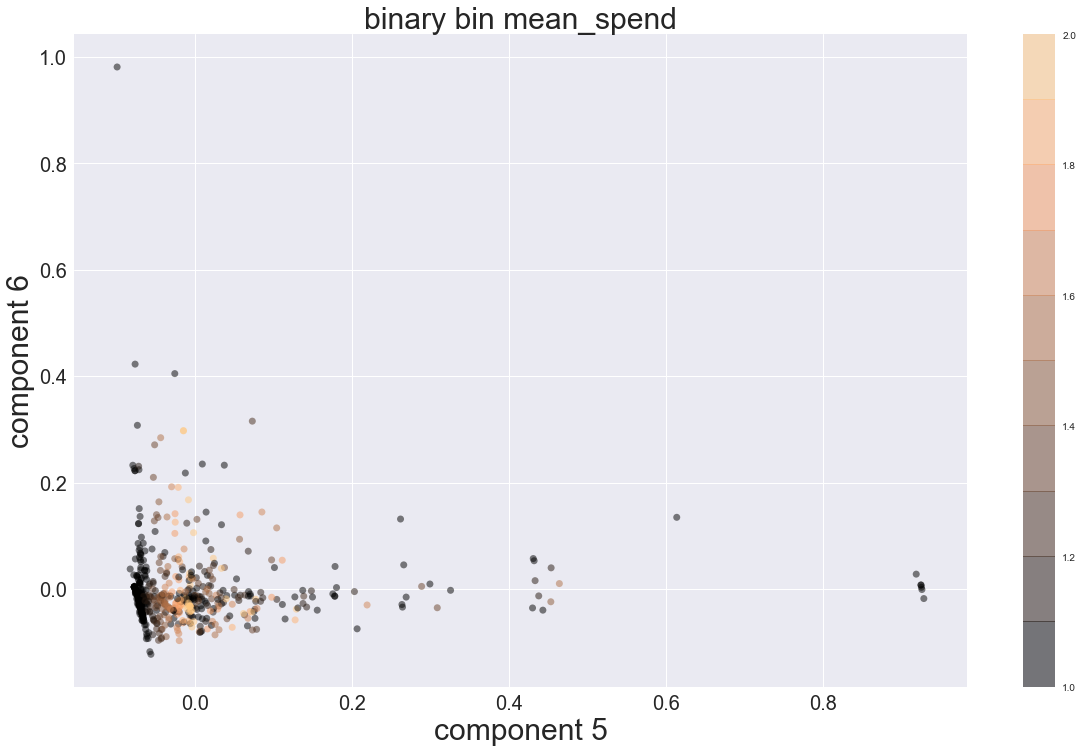

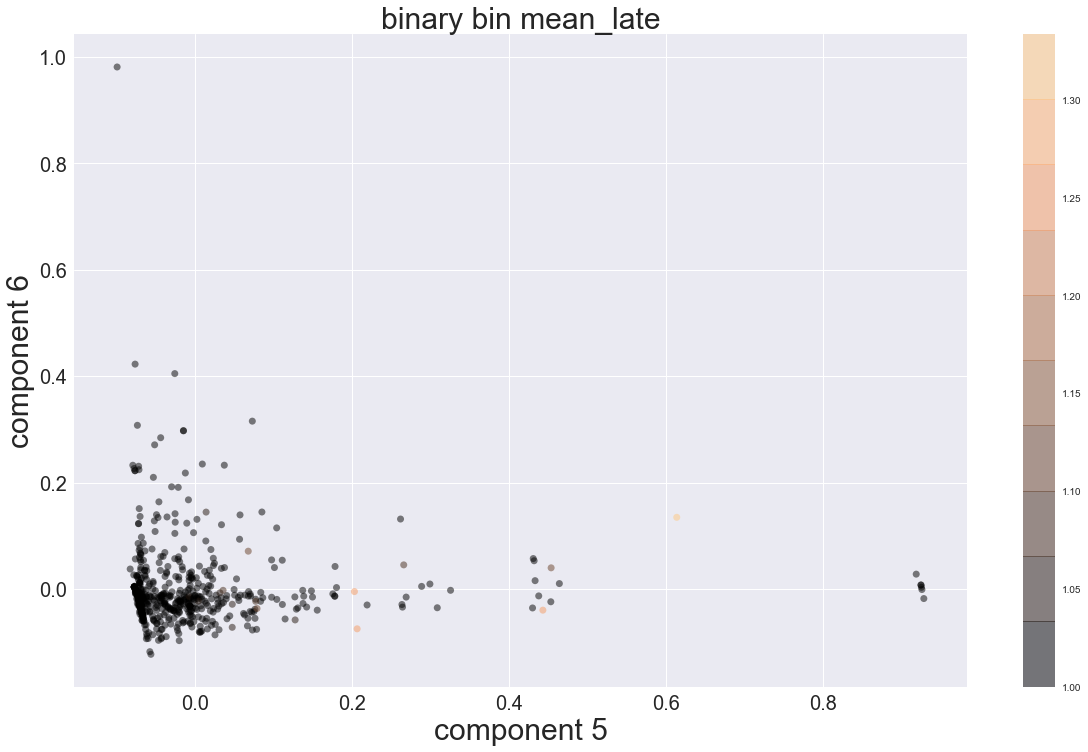

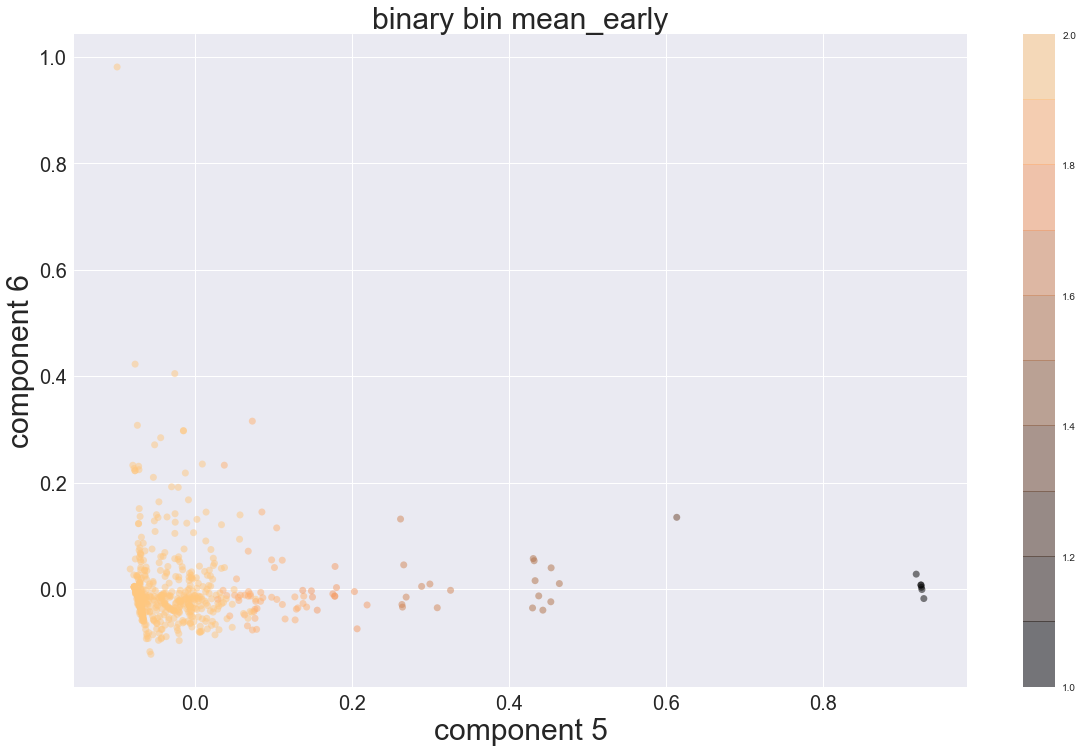

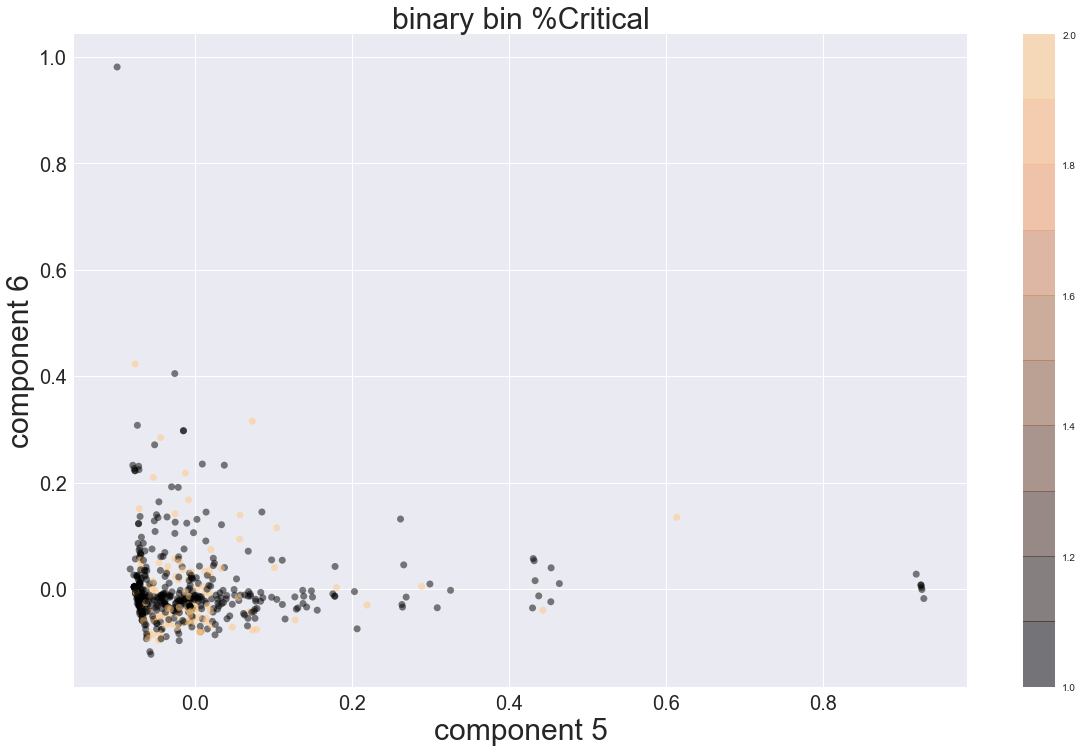

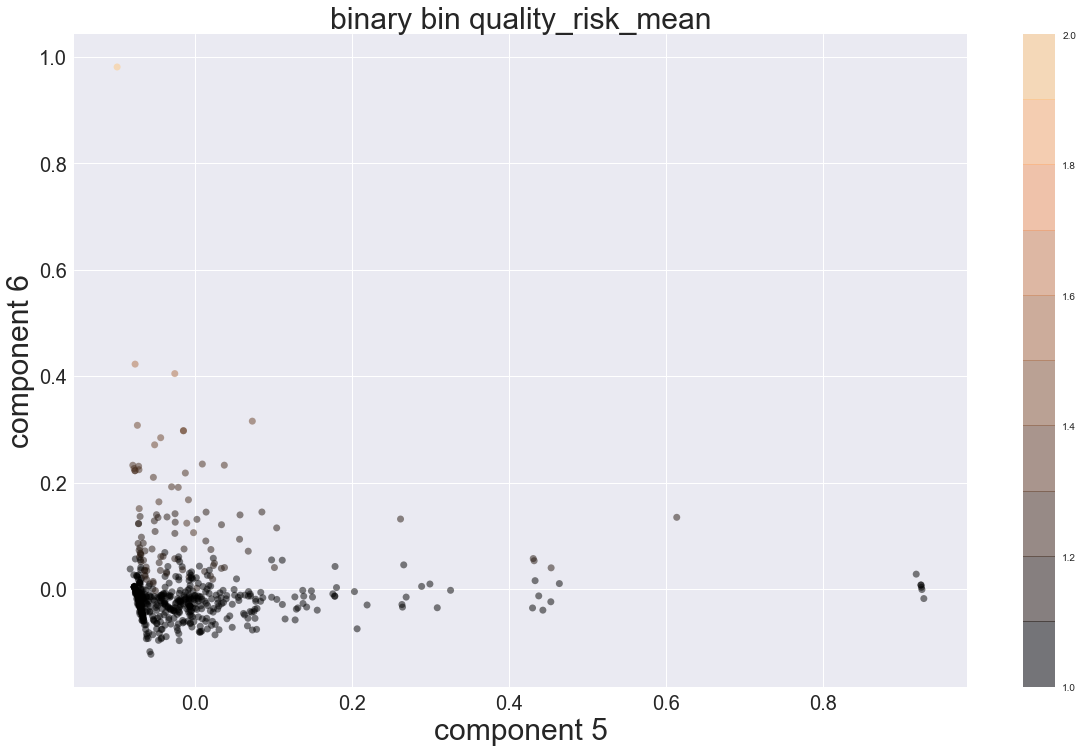

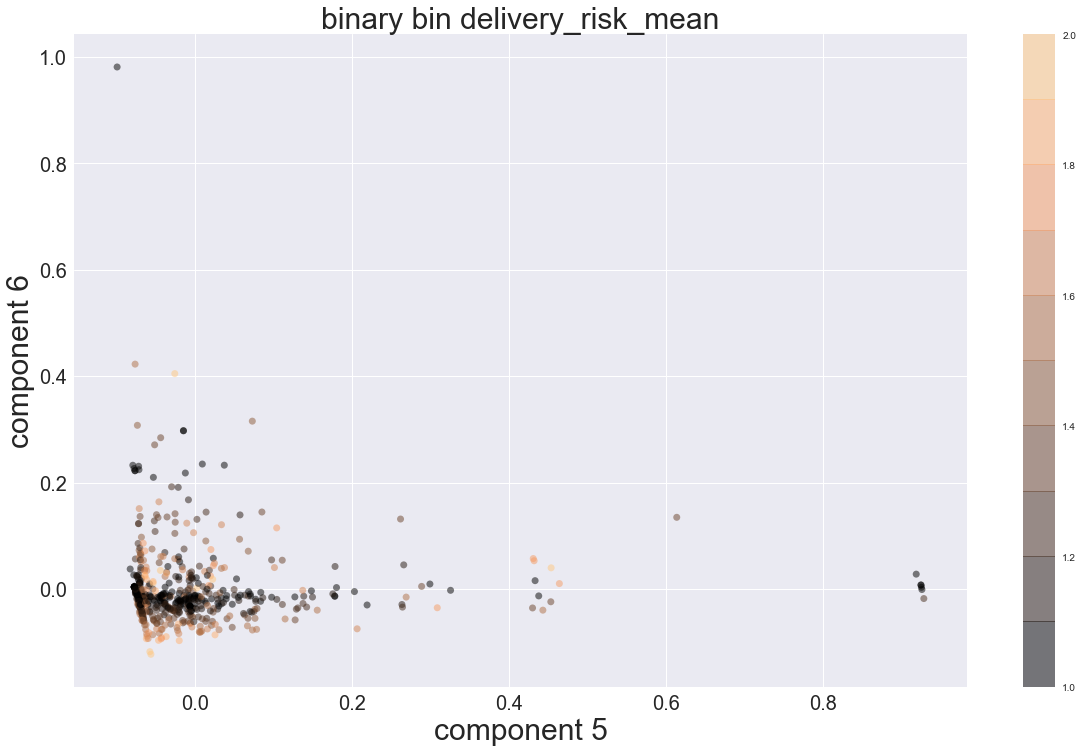

In [12]:
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 4], projected[:, 5],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 5', fontsize=30)
    plt.ylabel('component 6', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+" bin "+feat, fontsize=30)
    plt.colorbar();
    fname = method+"_"+file+"_PCA_5_6_" + feat
    plt.savefig(fname)
    plt.show()